#**K-means Clustering**

---
**Objective:** Build kmeans from scratch, and try it on an example


##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Prepare Your Data for Clustering

Let's say we want to generate data and let kmeans clustering know how to divide it between clusters.
<br> We would choose centers on our own, then throw random points around those centers.

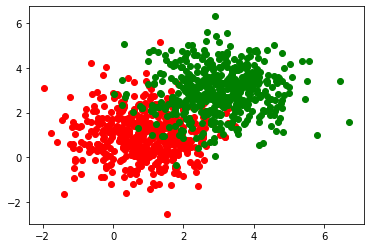

In [ ]:
#Define the center for each cluster
center_1 = np.array([1,1])
center_2 = np.array([3,3])

#Define the number of points you want in each cluster
n_points = 500 

#Define numpy arrays that hold data points in each cluster
class_1 = np.empty((n_points, 2))
class_2 = np.empty((n_points, 2))

for i in range(n_points):
  #Create the artificial points around the centers of the clusters within a specific radius
  random_point_1 = center_1 + np.random.randn(2)
  random_point_2 = center_2 + np.random.randn(2) #n n randn for the points to be normally distributed 
  class_1[i,:] = random_point_1
  class_2[i,:] = random_point_2

plt.scatter(class_1[:,0], class_1[:,1], c='r')
plt.scatter(class_2[:,0], class_2[:,1], c='g')
plt.show()

#Implementing K-means

Now we will implement k-means algorithm from scratch.
we need the center and the data points for the algorithm to work.

In [ ]:
def k_means(data, n_clusters, max_iter=100):
  #data is a numpy array of dimensions (2*n_points, 2)

  centers = []

  #Choose random datapoints as centers

  for i in range(n_clusters):

    #Choose the center index for each cluster
    center_index = np.random.randint(0, data.shape[0]) #we xcan choose the centroid of coordinates outside the random varibales bas better to choose it from the data to ensure an efficient start #randint will generate integer between 2 values 
    centers.append(data[center_index]) 

  centers = np.array(centers)

  outputs= np.empty(data.shape[0])

  for iter in range(max_iter):

    prev_centers =np.copy(centers) #Save a copy of the previous centers

    for i in range(data.shape[0]):

      #Calculate the distances between each point and the centers
      distances = np.linalg.norm(data[i,:]-centers,axis=1)

      #Classify the data based on that
      outputs[i] = np.argmin(distances)

    #Update Centers
    for c in range(n_clusters):

      index = np.where(outputs==c) #Take indices of points that belong to a cluster
      centers [c,:] = np.mean(data[index], axis=0) #Take the mean of the points belonging to this cluster
    
    #Calculate how much the new centers deviated from the previous ones. 
    #We calculate the distance between the old and the new centers
    change_in_centers = np.linalg.norm(prev_centers-centers)

    if(change_in_centers<0.1):
      break

  return centers, outputs, iter

  

Pass the data to k-means algorithm.

In [ ]:
# Stack the data from the 2 classes
data = np.vstack([class_1, class_2])
centers, outputs, iter = k_means(data, 2)
print(centers)
print("Executed ", iter, " iterations")

[[3.06865331 3.05473767]
 [0.87229597 0.94382228]]
Executed  2  iterations


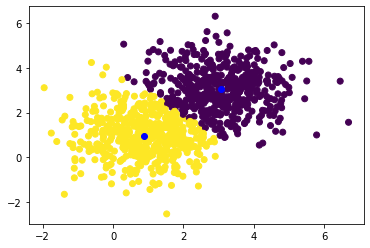

In [ ]:
plt.scatter(data[:,0], data[:,1], c=outputs)
plt.scatter(centers[:,0], centers[:,1], c='b')

#K-means using Scikit Learn

Now, we will run the same example but using the sklearn library

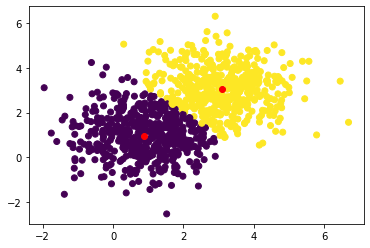

In [ ]:
#Train using sklearn
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=2) #Define the model
kmeans.fit(data)

#Get the corresponding outputs
outputs = kmeans.labels_
centers = kmeans.cluster_centers_

#See the result

plt.scatter(data[:,0], data[:,1], c=outputs)
plt.scatter(centers[:,0], centers[:,1], c='r')